## Imports 


In [1]:
import os
import numpy as np
import numpy.random as npr
import pandas as pd


from tqdm.auto import trange

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"

In [3]:
import utils

In [4]:
utils.get_data_root()

'/data/'

In [5]:
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorNeuropixelsProjectCache

cache_dir = data_root

cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(cache_dir=cache_dir, use_static_cache=True)

In [6]:
behavior_table = cache.get_behavior_session_table()
behavior_table = behavior_table.loc[~behavior_table["ecephys_session_id"].isna()]
len(behavior_table)

812

In [7]:
ecephys_table = cache.get_ecephys_session_table()
ecephys_table = ecephys_table.loc[~ecephys_table["behavior_session_id"].isna()]

In [8]:
behavior_session_ids = list(ecephys_table['behavior_session_id'])

In [86]:
# session_root = data_root + 'visual-behavior-neuropixels/behavior_ecephys_sessions/'
# ecephys_folder = os.listdir(session_root)
# len(ecephys_folder)

In [79]:
# ecephys_folder_set = set([int(x) for x in os.listdir('/data/visual-behavior-neuropixels/behavior_ecephys_sessions')])

In [78]:
# ecephys_table_set = set(ecephys_table.index.values)

In [77]:
# ecephys_folder_set.difference(ecephys_table_set)

In [87]:
# cache.get_ecephys_session_table(filter_abnormalities=False)

In [ ]:
behavior_data = []

for session_id in behavior_session_ids: 
    #print(session_id)
    # Behavior session metadata
    session_metadata = cache.get_behavior_session(session_id)
    
    # Trial metadata
    trial_metadata = session_metadata.trials
    
    # Filter for go trials
    go_trials =  trial_metadata[trial_metadata.go].index
    
    # Get timestamps corresponding to go trials
    trial_start = trial_metadata.start_time[np.where(trial_metadata.go)[0]]
    trial_stop = trial_metadata.stop_time[np.where(trial_metadata.go)[0]]

    # Get running speed and corresponding timestamps
    running_time = session_metadata.running_speed.timestamps
    running_speed = session_metadata.running_speed.speed
    mean_speed = [np.nanmean(running_speed[np.logical_and(s1 <= running_time, running_time <= s2)]) for s1, s2 in zip(trial_start, trial_stop)]

    # Get pupil size and corresponding timestamps
    pupil_time = session_metadata.eye_tracking.timestamps
    pupil_area = session_metadata.eye_tracking.pupil_area
    mean_pupil_area = [np.nanmean(pupil_area[np.logical_and(s1 <= pupil_time, pupil_time <= s2)]) for s1, s2 in zip(trial_start, trial_stop)]

    # Construct a dataframe for each session
    behavior_data.append(pd.DataFrame({'Trials': go_trials, 
                'Mean speed': mean_speed, 
                'Mean pupil area': mean_pupil_area}))




/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/

In [104]:
behavior_data[0]

,Trials,Mean speed,Mean pupil area
0,10,8.545048,3681.716253
1,11,6.640839,3454.141769
2,21,11.859119,2749.421316
3,23,14.737972,2878.641596
4,30,14.762672,2784.946588
...,...,...,...
234,662,15.379031,4377.987547
235,664,7.506162,4073.981622
236,666,14.589344,4269.875406
237,667,14.663943,3908.803405


In [118]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

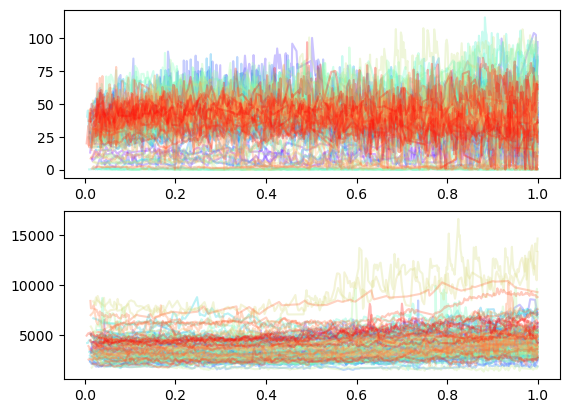

In [157]:
# Define colors for each cluster
import matplotlib as mpl
from matplotlib.pyplot import cm
c1='red' #blue
c2='blue' #green
n = len(behavior_data)
x = np.linspace(0,3*np.pi,100)
color = iter(cm.rainbow(np.linspace(0, 1, n)))
# for i in range(n):
#    c = next(color)
#    plt.plot(x, y, c=c)

# for i in range(1,n+1):
#     ax.plot(x,i*np.sin(x),color=colorFader(c1,c2,i/n),linewidth = 1)
# colors = ['b', 'r', 'g', 'purple', 'orange']
fig, ax = plt.subplots(nrows=2, ncols=1)
average_mean_speed = behavior_data[i]['Mean speed']
# Plot the generated data with different colors for each cluster
#plt.figure(figsize=(4, 3))
for i in range(len(behavior_data)):
    color_item = next(color)
    ax[0].plot(np.array(behavior_data[i]['Trials'])/np.array(behavior_data[i]['Trials'])[-1], 
               behavior_data[i]['Mean speed'], c=color_item, alpha=.3)
    ax[1].plot(np.array(behavior_data[i]['Trials'])/np.array(behavior_data[i]['Trials'])[-1], 
               behavior_data[i]['Mean pupil area'], c=color_item, alpha=.3)
    #plt.plot(behavior_data[i]['Trials'], behavior_data[i]['Mean speed'], c=colors[i])



In [149]:
len(behavior_data)

103

In [185]:
mean_speed_array = []

for i in range(len(behavior_data)):
    mean_speed_array.append(list(behavior_data[i]['Mean speed']))
# mean_speed_array = np.array(mean_speed_array)

In [186]:
len(mean_speed_array)

103

In [195]:
np.array(mean_speed_array)

/tmp/ipykernel_73/928862304.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(mean_speed_array)


array([list([8.545048044657124, 6.640838617697538, 11.859118985775318, 14.737971971939283, 14.762671522292898, 17.714407739494888, 15.848893215096338, 14.153768810742475, 14.864139092977812, 12.709014245785996, 14.804802316632482, 12.37717089535916, 12.556104208911004, 14.484407366226252, 13.65558696316632, 12.887659135783718, 12.343523323355484, 7.007206869410548, 11.798335495229406, 12.065123615453075, 10.674982348119652, 10.903491400776176, 11.926630180362487, 12.36558575767817, 12.301703855490208, 15.929163349357033, 15.988685654276134, 13.772034226128323, 13.004638403132999, 13.115172023313194, 14.79929418498589, 12.006045549583087, 16.15846660164858, 15.95545774877733, 12.355546567682435, 14.127811012077403, 14.076941748424794, 13.049968762112831, 13.668996958066717, 13.788148225560386, 14.740643864399317, 14.63217648018482, 13.009891870432797, 13.655786231860128, 11.698623123511807, 8.673194541125305, 12.514221029654754, 11.77248727256926, 14.703120393546758, 13.127321011067732,

In [194]:
for i in range(len())

AxisError: axis 1 is out of bounds for array of dimension 1